In [1]:
using Pkg,Plots
Pkg.activate("..")
using JuliaSAFT

Activating environment at `~/Documents/University/UROP/SAFT codes/JuliaSAFT/Project.toml`


In this notebook we will try to replicate various figures from J. Gross and G. Sadowski's 2001 paper

## Figure 3

In [20]:
# Setting up the models
methane      = system(["methane"],"PCSAFT")
propylene    = system(["propylene"],"PCSAFT")
toluene      = system(["toluene"],"PCSAFT")
diethylether = system(["diethyl ether"],"PCSAFT");

In [21]:
# Get critical point for all species
(T_c_methane, p_c_methane, v_c_methane)                = get_Pcrit(methane)
(T_c_propylene, p_c_propylene, v_c_propylene)          = get_Pcrit(propylene)
(T_c_toluene, p_c_toluene, v_c_toluene)                = get_Pcrit(toluene)
(T_c_diethylether, p_c_diethylether, v_c_diethylether) = get_Pcrit(diethylether);

In [22]:
# Get saturation properties for all species
T_methane      = range(100, T_c_methane, length = 100)
T_propylene    = range(120, T_c_propylene, length = 100)
T_toluene      = range(170, T_c_toluene, length = 100)
T_diethylether = range(150, T_c_diethylether, length = 100)

(P_sat_methane, v_l_methane, v_v_methane)                = get_Psat(methane,T_methane)
(P_sat_propylene, v_l_propylene, v_v_propylene)          = get_Psat(propylene,T_propylene)
(P_sat_toluene, v_l_toluene, v_v_toluene)                = get_Psat(toluene,T_toluene)
(P_sat_diethylether, v_l_diethylether, v_v_diethylether) = get_Psat(diethylether,T_diethylether);

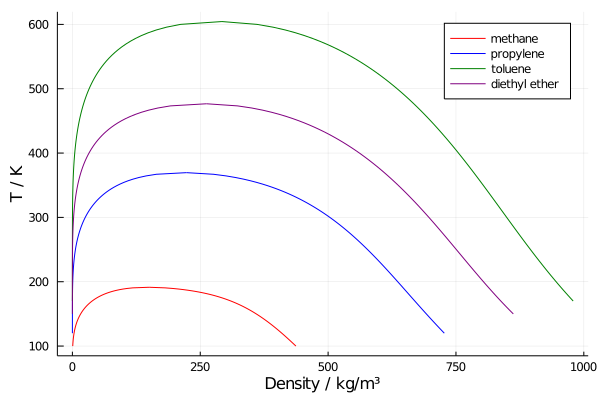

In [24]:
plt = plot(0.016 ./v_l_methane, T_methane,color=:red,xlabel="Density / kg/m³",ylabel="T / K", label = "methane")
plt = plot!(0.016 ./v_v_methane, T_methane,color=:red, label = "")
plt = plot!(0.042 ./v_l_propylene, T_propylene,color=:blue, label = "propylene")
plt = plot!(0.042 ./v_v_propylene, T_propylene,color=:blue, label = "")
plt = plot!(0.092 ./v_l_toluene, T_toluene,color=:green, label = "toluene")
plt = plot!(0.092 ./v_v_toluene, T_toluene,color=:green, label = "")
plt = plot!(0.074 ./v_l_diethylether, T_diethylether,color=:purple, label = "diethyl ether")
plt = plot!(0.074 ./v_v_diethylether, T_diethylether,color=:purple, label = "")
display(plt)

## Figure 4

In [6]:
# Setting up the models
CO2      = system(["carbon dioxide"],"PCSAFT");

In [7]:
# Get critical point
(T_c_CO2, p_c_CO2, v_c_CO2) = get_Pcrit(CO2);

In [8]:
# Get saturation properties
T_CO2      = range(220, T_c_CO2, length = 100)

(P_sat_CO2, v_l_CO2, v_v_CO2) = get_Psat(CO2,T_CO2);

In [9]:
# Get various isobars
p = 10 .^(5 .+range(0.7,3,length=200))
z = create_z(CO2,[1.0])
v_1 = []
v_2 = []
v_3 = []
v_4 = []
for i in p
    append!(v_1,get_volume(CO2,z,i,320))
    append!(v_2,get_volume(CO2,z,i,400))
    append!(v_3,get_volume(CO2,z,i,300))
    append!(v_4,get_volume(CO2,z,i,270))
end

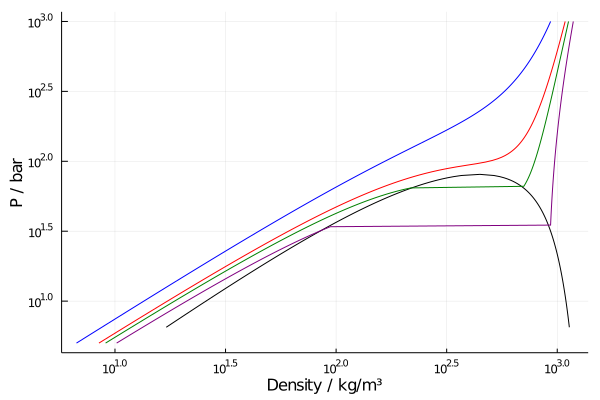

In [10]:
plt = plot(0.044 ./v_l_CO2, P_sat_CO2/1e5,xaxis=:log,yaxis=:log,color=:black,xlabel="Density / kg/m³",ylabel="P / bar", label = "")
plt = plot!(0.044 ./v_v_CO2, P_sat_CO2/1e5,color=:black, label = "")
plt = plot!(0.044 ./v_1, p/1e5,color=:red, label = "")
plt = plot!(0.044 ./v_2, p/1e5,color=:blue, label = "")
plt = plot!(0.044 ./v_3, p/1e5,color=:green, label = "")
plt = plot!(0.044 ./v_4, p/1e5,color=:purple, label = "")
display(plt)

## Figure 6

In [11]:
# Setting up the models
benzene      = system(["benzene"],"PCSAFT")
isobutane    = system(["isobutane"],"PCSAFT");

In [12]:
(T_c_benzene, p_c_benzene, v_c_benzene)       = get_Pcrit(benzene)
(T_c_isobutane, p_c_isobutane, v_c_isobutane) = get_Pcrit(isobutane);

In [13]:
# Get enthalpies of vapourisation
h_vap_benzene   = get_enthalpy_vap(benzene,T_c_benzene*range(0.5,1,length=100))
h_vap_propylene = get_enthalpy_vap(propylene,T_c_propylene*range(0.3,1,length=100))
h_vap_isobutane = get_enthalpy_vap(isobutane,T_c_isobutane*range(0.3,1,length=100));

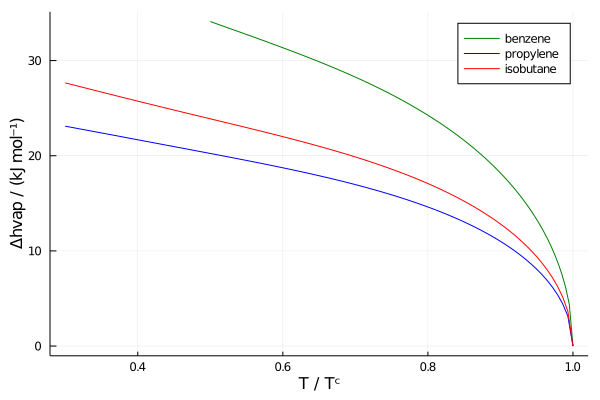

In [14]:
plt = plot(range(0.5,1,length=100), h_vap_benzene/1e3,color=:green,xlabel="T / Tᶜ",ylabel="Δhvap / (kJ mol⁻¹)", label = "benzene")
plt = plot!(range(0.3,1,length=100), h_vap_propylene/1e3,color=:blue,label = "propylene")
plt = plot!(range(0.3,1,length=100), h_vap_isobutane/1e3,color=:red,label = "isobutane")
display(plt)

## Figure 16

In [15]:
# Creating models
chlorobut = system(["1-chlorobutane"],"PCSAFT")
hexane    = system(["hexane"],"PCSAFT")
mix       = system(["hexane","1-chlorobutane"],"PCSAFT");

In [16]:
# Get pure enthalpies
h_1 = get_enthalpy(chlorobut,create_z(chlorobut,[1]),1.01e5,298)
h_2 = get_enthalpy(hexane,create_z(hexane,[1]),1.01e5,298);

In [17]:
# Get excess enthalpy
x = range(1e-10,1-1e-10,length=100)
h_E = []
for i in x
    append!(h_E,get_enthalpy(mix,create_z(mix,[i,1-i]),1.01e5,298)-i*h_2-(1-i)*h_1)
end

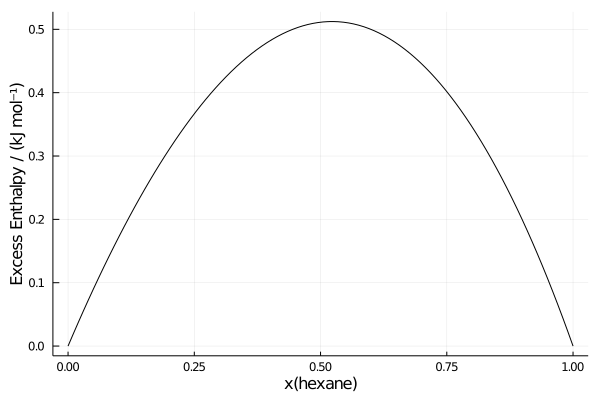

In [19]:
plt = plot(1 .-x, h_E/1e3,color=:black,xlabel="x(hexane)",ylabel="Excess Enthalpy / (kJ mol⁻¹)",label="")
display(plt)